In [1]:
%pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


from utils import (
    CLEAN_COMPLETE_DATA_FILE_PATH,
    FEATURES_DATA_FILE_PATH)

TRAIN_START_DATE updated to: 2020-06-01, TRAIN_END_DATE updated to: 2024-07-05


In [3]:
data = pd.read_parquet(CLEAN_COMPLETE_DATA_FILE_PATH)
data['date'] = pd.to_datetime(data['date'])

print(f'Running exploratory data analysis on {data.shape[0]} rows and {len(data.columns)} columns')
data.head()


Running exploratory data analysis on 1182033 rows and 78 columns


,date,symbol,target,open,high,low,close,volume,name,keywords,...,cpi_India,cpi_Italy,cpi_Brazil,cpi_South Korea,cpi_Mexico,cpi_Saudi Arabia,cpi_Australia,cpi_Canada,cpi_France,year
0,2020-06-01,0xBTC,0.0,0.142721,0.152836,0.133416,0.145287,1227624,0xBitcoin,0xBitcoin,...,128.5304,102.7,124.0019,105.027448,122.5766,107.8078,96.96129,106.97271,106.01,2020
1,2020-06-01,SENSO,0.0,0.240752,0.257436,0.238777,0.248901,1562604,SENSO,SENSO Token,...,128.5304,102.7,124.0019,105.027448,122.5766,107.8078,96.96129,106.97271,106.01,2020
2,2020-06-01,FCT,0.0,1.810519,1.916731,1.765896,1.890572,405259,FirmaChain,FirmaChain,...,128.5304,102.7,124.0019,105.027448,122.5766,107.8078,96.96129,106.97271,106.01,2020
3,2020-06-01,ADX,0.0,0.092347,0.095945,0.090926,0.093641,444095,AdEx,AdEx,...,128.5304,102.7,124.0019,105.027448,122.5766,107.8078,96.96129,106.97271,106.01,2020
4,2020-06-01,ARRR,0.0,0.029034,0.029254,0.025792,0.028084,79637,Pirate Chain,Pirate Chain,...,128.5304,102.7,124.0019,105.027448,122.5766,107.8078,96.96129,106.97271,106.01,2020


In [4]:
# Summary statistics
summary_stats = data.describe(include='all')
summary_stats

,date,symbol,target,open,high,low,close,volume,name,keywords,...,cpi_India,cpi_Italy,cpi_Brazil,cpi_South Korea,cpi_Mexico,cpi_Saudi Arabia,cpi_Australia,cpi_Canada,cpi_France,year
count,1182033,1182033,1.182033e+06,1.182033e+06,1.182033e+06,1.182033e+06,1.182033e+06,1.182033e+06,1182033,1182033,...,1.182033e+06,1.182033e+06,1.182033e+06,1.182033e+06,1.182033e+06,1.182033e+06,1.182033e+06,1.182033e+06,1.182033e+06,1.182033e+06
unique,NaN,1413,NaN,NaN,NaN,NaN,NaN,NaN,1411,1405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,EXM,NaN,NaN,NaN,NaN,NaN,NaN,Ellipsis,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1096,NaN,NaN,NaN,NaN,NaN,NaN,1499,4049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2022-09-21 22:37:51.609675520,NaN,1.740241e-01,2.305867e+02,2.578573e+02,2.080584e+02,2.171600e+02,8.390433e+07,NaN,NaN,...,1.443419e+02,1.138924e+02,1.480253e+02,1.140456e+02,1.412926e+02,1.116534e+02,1.006219e+02,1.193640e+02,1.156738e+02,2.022230e+03
min,2020-06-01 00:00:00,NaN,0.000000e+00,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e+00,NaN,NaN,...,1.285304e+02,1.023000e+02,1.240019e+02,1.050274e+02,1.225766e+02,1.075590e+02,9.653792e+01,1.068126e+02,1.052700e+02,2.020000e+03
25%,2021-10-28 00:00:00,NaN,0.000000e+00,8.212000e-03,8.748000e-03,7.768000e-03,8.189000e-03,8.950500e+04,NaN,NaN,...,1.377200e+02,1.062000e+02,1.409634e+02,1.094971e+02,1.333462e+02,1.089486e+02,9.911849e+01,1.131381e+02,1.090900e+02,2.021000e+03
50%,2022-10-10 00:00:00,NaN,0.000000e+00,8.513800e-02,9.005300e-02,8.034700e-02,8.486900e-02,6.067130e+05,NaN,NaN,...,1.459832e+02,1.187000e+02,1.497836e+02,1.151264e+02,1.437426e+02,1.122566e+02,1.007104e+02,1.207446e+02,1.167000e+02,2.022000e+03
75%,2023-09-11 00:00:00,NaN,5.000000e-01,7.874290e-01,8.305360e-01,7.453570e-01,7.855220e-01,4.645240e+06,NaN,NaN,...,1.530345e+02,1.201000e+02,1.558365e+02,1.188477e+02,1.490042e+02,1.139262e+02,1.019929e+02,1.261093e+02,1.214000e+02,2.023000e+03
max,2024-08-12 00:00:00,NaN,1.000000e+00,1.573471e+07,1.716332e+07,1.441873e+05,1.709341e+05,6.131225e+11,NaN,NaN,...,1.541362e+02,1.206000e+02,1.610515e+02,1.195118e+02,1.535505e+02,1.151810e+02,1.046838e+02,1.261894e+02,1.237800e+02,2.024000e+03


# Active - open source indicator

In [5]:
data['is_open_source_and_active'] = data['is_open_source'] * data['is_active']

# Size Factor

In [6]:
# Log-transform of market capitalization to reduce skewness and compress range
data['log_market_cap'] = np.log(data['market_cap'] + 1)  # +1 to avoid log(0)

data['size_factor'] = (data['log_market_cap'] * 1000).round().astype(int)

sorted_data = data.sort_values(by='size_factor', ascending=False)

# Print the sorted DataFrame
sorted_data.head(1000)

,date,symbol,target,open,high,low,close,volume,name,keywords,...,cpi_South Korea,cpi_Mexico,cpi_Saudi Arabia,cpi_Australia,cpi_Canada,cpi_France,year,is_open_source_and_active,log_market_cap,size_factor
1157120,2024-07-15,BTC,0.00,60815.457031,64870.152344,60704.929688,64870.152344,38094526099,Bitcoin,Bitcoin,...,118.847681,153.5505,115.1810,104.68380,126.189364,123.78,2024,1,27.757491,27757
52023,2020-10-07,BTC,1.00,10603.355469,10680.507812,10562.506836,10668.968750,37799458436,Bitcoin,Bitcoin,...,105.512369,124.1875,107.8493,97.36175,107.853473,105.50,2020,1,27.757491,27757
1165654,2024-07-24,BTC,0.00,65927.859375,67113.984375,65146.996094,65372.132812,27470942309,Bitcoin,Bitcoin,...,118.847681,153.5505,115.1810,104.68380,126.189364,123.78,2024,1,27.757491,27757
44060,2020-09-21,BTC,0.75,10934.925781,10988.304688,10380.260742,10462.259766,28884999244,Bitcoin,Bitcoin,...,105.607244,124.0939,107.9530,96.53792,107.533195,105.27,2020,1,27.757491,27757
33448,2020-08-26,BTC,0.75,11366.894531,11530.052734,11296.993164,11488.363281,22466660958,Bitcoin,Bitcoin,...,106.197582,123.3410,107.8804,97.66409,106.812571,105.30,2020,1,27.757491,27757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607465,2022-10-27,BTC,0.50,20772.802734,20854.044922,20255.373047,20285.835938,49625110402,Bitcoin,Bitcoin,...,115.010485,143.7426,112.2566,100.59520,121.225062,116.81,2022,1,27.757491,27757
206909,2021-06-30,BTC,0.75,35908.386719,36074.757812,34086.152344,35040.835938,34059036099,Bitcoin,Bitcoin,...,107.799928,129.6932,108.2745,99.51328,111.456596,107.64,2021,1,27.757491,27757
1051512,2024-03-15,BTC,0.75,71387.875000,72357.132812,65630.695312,69403.773438,78320453976,Bitcoin,Bitcoin,...,118.847681,153.2561,114.9943,102.29240,126.189364,123.41,2024,1,27.757491,27757
109168,2021-01-26,BTC,0.50,32358.613281,32794.550781,31030.265625,32569.849609,60255421470,Bitcoin,Bitcoin,...,107.083089,126.5273,107.7145,101.48160,108.974445,106.07,2021,1,27.757491,27757


# Liquidity factor

In [7]:
# Log-transform of trade volume
data['log_volume'] = np.log(data['volume'] + 1)  # +1 to avoid taking log of zero

# Scale the log values to a more readable range and convert to integer
# Adjust the scaling factor based on the desired granularity and range
data['scaled_log_volume'] = (data['log_volume'] * 1000).round().astype(int)

# Assigning scaled_log_volume as the liquidity factor
data['liquidity_factor'] = data['scaled_log_volume']

sorted_data = data.sort_values(by='liquidity_factor', ascending=False)

# Print the sorted DataFrame
sorted_data.head(1000)

,date,symbol,target,open,high,low,close,volume,name,keywords,...,cpi_Australia,cpi_Canada,cpi_France,year,is_open_source_and_active,log_market_cap,size_factor,log_volume,scaled_log_volume,liquidity_factor
455919,2022-05-06,ZIL,0.50,0.078861,0.085011,0.072085,0.081526,613122511429,Zilliqa,Zilliqa,...,100.42370,119.543604,114.60,2022,1,19.323661,19324,27.141831,27142,27142
127601,2021-02-26,BTC,0.25,47180.464844,48370.785156,44454.843750,46339.761719,350967941479,Bitcoin,Bitcoin,...,102.09730,108.974445,106.80,2021,1,27.757491,27757,26.583961,26584,26584
127095,2021-02-26,LINK,0.25,24.734232,26.948971,23.761681,25.187313,170549323809,Chainlink,Chainlink,...,102.09730,108.974445,106.80,2021,1,22.531246,22531,25.862290,25862,25862
177757,2021-05-19,BTC,0.75,42944.976562,43546.117188,30681.496094,37002.441406,126358098747,Bitcoin,Bitcoin,...,100.88100,111.056249,107.57,2021,1,27.757491,27757,25.562386,25562,25562
100659,2021-01-11,BTC,0.25,38346.531250,38346.531250,30549.599609,35566.656250,123320567399,Bitcoin,Bitcoin,...,101.48160,108.974445,106.07,2021,1,27.757491,27757,25.538053,25538,25538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258815,2021-09-09,ETH,0.50,3452.548340,3562.992676,3400.517090,3427.340088,24118055831,Ethereum,Ethereum,...,99.79613,112.977914,108.64,2021,1,26.406312,26406,23.906227,23906,23906
55113,2020-10-14,BTC,1.00,11429.047852,11539.977539,11307.831055,11429.506836,24103426719,Bitcoin,Bitcoin,...,97.36175,107.853473,105.50,2020,1,27.757491,27757,23.905620,23906,23906
816916,2023-06-23,BTC,0.50,29896.382812,31389.539062,29845.214844,30695.468750,24115570085,Bitcoin,Bitcoin,...,101.94860,125.228531,120.77,2023,1,27.757491,27757,23.906124,23906,23906
999382,2024-01-16,BTC,0.75,42499.335938,43566.273438,42085.996094,43154.945312,24062872740,Bitcoin,Bitcoin,...,101.04990,126.189364,122.35,2024,1,27.757491,27757,23.903936,23904,23904


# Extracting features from the close price

In [8]:
original_columns = data.columns.tolist()

for lag in [1, 3, 7, 14, 30]:  # you can adjust the lags as needed
    data[f'ma_{lag}'] = data['close'].rolling(window=lag).mean()
    data[f'lag_{lag}'] = data['close'].shift(lag)
    data[f'roc_{lag}'] = data['close'].pct_change(periods=lag) * 100
    data[f'momentum_{lag}'] = data['close'] - data['close'].shift(lag)
    data[f'pct_chg_{lag}'] = data.groupby('symbol')['close'].pct_change(periods=lag)
    data[f'ema_{lag}'] = data['close'].ewm(span=lag, adjust=False).mean()
    # data[f'rolling_std_{lag}'] = data['close'].rolling(window=lag).std()
    data[f'close_lag_{lag}'] = data.groupby('symbol')['close'].shift(lag)
                   
data.dropna(inplace=True)

new_columns = data.columns.tolist()
close_price_fetures = [col for col in new_columns if col not in original_columns]

print(close_price_fetures)

print(f'Data Overview after adding features: {data.shape[0]} rows and {len(data.columns)} columns.')
data.head()

['ma_1', 'lag_1', 'roc_1', 'momentum_1', 'pct_chg_1', 'ema_1', 'close_lag_1', 'ma_3', 'lag_3', 'roc_3', 'momentum_3', 'pct_chg_3', 'ema_3', 'close_lag_3', 'ma_7', 'lag_7', 'roc_7', 'momentum_7', 'pct_chg_7', 'ema_7', 'close_lag_7', 'ma_14', 'lag_14', 'roc_14', 'momentum_14', 'pct_chg_14', 'ema_14', 'close_lag_14', 'ma_30', 'lag_30', 'roc_30', 'momentum_30', 'pct_chg_30', 'ema_30', 'close_lag_30']
Data Overview after adding features: 1138715 rows and 119 columns.


,date,symbol,target,open,high,low,close,volume,name,keywords,...,pct_chg_14,ema_14,close_lag_14,ma_30,lag_30,roc_30,momentum_30,pct_chg_30,ema_30,close_lag_30
15304,2020-07-13,PCI,0.0,0.143664,0.147483,0.140770,0.143750,1200432,Paycoin,Paycoin,...,-0.065430,0.899504,0.153814,0.821508,0.004115,3.393317e+03,0.139635,-0.071856,1.618154,0.154879
15305,2020-07-13,ICX,0.5,0.395887,0.431316,0.395501,0.410839,46141104,ICON,ICON,...,0.268977,0.834348,0.323756,0.835073,0.003886,1.047228e+04,0.406953,0.197069,1.540263,0.343204
15306,2020-07-13,DDK,0.0,4.472541,4.487512,4.191892,4.233489,75194,DDKoin,DDKoin,...,0.486547,1.287567,2.847867,0.976184,0.000152,2.785090e+06,4.233337,0.791765,1.714019,2.362748
15307,2020-07-13,OGN,0.0,0.314618,0.316820,0.284335,0.292777,11989866,Origin Protocol,Origin Protocol,...,-0.079239,1.154928,0.317973,0.978452,0.224729,3.028003e+01,0.068048,0.479008,1.622326,0.197955
15308,2020-07-13,BOA,0.0,0.070873,0.075609,0.070334,0.071849,1224509,BOSagora,BOSagora,...,-0.052536,1.010518,0.075833,0.977307,0.106203,-3.234748e+01,-0.034354,0.200605,1.522296,0.059844


In [9]:
# # Isolate Bitcoin's closing prices
# btc_prices = data[data['symbol'] == 'BTC'].set_index('date')['close']

# # Join Bitcoin's close prices back to the main DataFrame on the date
# data = data.join(btc_prices, on='date', rsuffix='_btc')


# # List of unique symbols
# symbols = data['symbol'].unique()

# # Empty list to collect results
# results = []

# # Loop through each symbol and calculate rolling correlations separately
# for symbol in symbols:
#     symbol_data = data[data['symbol'] == symbol].copy()  # Copy data for this symbol
#     for lag in [7, 14, 30]:  # Adjust lags as needed
#         symbol_data[f'btc_correlation_{lag}'] = symbol_data['close'].rolling(window=lag).corr(symbol_data['close_btc'])
    
#     results.append(symbol_data)  # Collect results

# # Concatenate all the results back into a single DataFrame
# data = pd.concat(results)

# # Handle NaNs or other final adjustments as needed
# # data.dropna(inplace=True)

# data.head(100)

In [10]:
print(data.columns.to_list())

['date', 'symbol', 'target', 'open', 'high', 'low', 'close', 'volume', 'name', 'keywords', 'total_supply', 'circulating_supply', 'market_cap', 'infinite_supply', 'is_open_source', 'source_code', 'is_active', 'fear_greed_value', 'fear_greed_classification', 'week_start', 'week_end', 'google_trend_score', 'gdp_Australia', 'gdp_Brazil', 'gdp_Canada', 'gdp_China', 'gdp_France', 'gdp_Germany', 'gdp_India', 'gdp_Italy', 'gdp_Japan', 'gdp_Korea Rep', 'gdp_Mexico', 'gdp_Russian Federation', 'gdp_Saudi Arabia', 'gdp_United Kingdom', 'gdp_United States', 'inflation_rate_Australia', 'inflation_rate_Brazil', 'inflation_rate_Canada', 'inflation_rate_China', 'inflation_rate_France', 'inflation_rate_Germany', 'inflation_rate_India', 'inflation_rate_Italy', 'inflation_rate_Japan', 'inflation_rate_Korea Rep', 'inflation_rate_Mexico', 'inflation_rate_Russian Federation', 'inflation_rate_Saudi Arabia', 'inflation_rate_United Kingdom', 'inflation_rate_United States', 'interest_rate_United States', 'intere

# Extracting features from the date

In [11]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['dayofweek'] = data['date'].dt.dayofweek

data['timestamp'] = data['date'].astype(int) / 1e9  # pandas uses nanoseconds by default

data.head()

,date,symbol,target,open,high,low,close,volume,name,keywords,...,lag_30,roc_30,momentum_30,pct_chg_30,ema_30,close_lag_30,month,day,dayofweek,timestamp
15304,2020-07-13,PCI,0.0,0.143664,0.147483,0.140770,0.143750,1200432,Paycoin,Paycoin,...,0.004115,3.393317e+03,0.139635,-0.071856,1.618154,0.154879,7,13,0,1.594598e+09
15305,2020-07-13,ICX,0.5,0.395887,0.431316,0.395501,0.410839,46141104,ICON,ICON,...,0.003886,1.047228e+04,0.406953,0.197069,1.540263,0.343204,7,13,0,1.594598e+09
15306,2020-07-13,DDK,0.0,4.472541,4.487512,4.191892,4.233489,75194,DDKoin,DDKoin,...,0.000152,2.785090e+06,4.233337,0.791765,1.714019,2.362748,7,13,0,1.594598e+09
15307,2020-07-13,OGN,0.0,0.314618,0.316820,0.284335,0.292777,11989866,Origin Protocol,Origin Protocol,...,0.224729,3.028003e+01,0.068048,0.479008,1.622326,0.197955,7,13,0,1.594598e+09
15308,2020-07-13,BOA,0.0,0.070873,0.075609,0.070334,0.071849,1224509,BOSagora,BOSagora,...,0.106203,-3.234748e+01,-0.034354,0.200605,1.522296,0.059844,7,13,0,1.594598e+09


# Adding the symbol as encoded

In [12]:
def custom_hash_encode(symbols, mod_value=10000019):
    # Apply hash, take absolute value to ensure positivity, and use modulo to limit the range
    return [abs(hash(symbol)) % mod_value for symbol in symbols]

# Apply the custom hash encode function to the 'symbol' column
data['symbol_encoded'] = custom_hash_encode(data['symbol'])

# Display the first few rows of the dataframe to see the result
data.head()

,date,symbol,target,open,high,low,close,volume,name,keywords,...,roc_30,momentum_30,pct_chg_30,ema_30,close_lag_30,month,day,dayofweek,timestamp,symbol_encoded
15304,2020-07-13,PCI,0.0,0.143664,0.147483,0.140770,0.143750,1200432,Paycoin,Paycoin,...,3.393317e+03,0.139635,-0.071856,1.618154,0.154879,7,13,0,1.594598e+09,8724623
15305,2020-07-13,ICX,0.5,0.395887,0.431316,0.395501,0.410839,46141104,ICON,ICON,...,1.047228e+04,0.406953,0.197069,1.540263,0.343204,7,13,0,1.594598e+09,8457401
15306,2020-07-13,DDK,0.0,4.472541,4.487512,4.191892,4.233489,75194,DDKoin,DDKoin,...,2.785090e+06,4.233337,0.791765,1.714019,2.362748,7,13,0,1.594598e+09,3653993
15307,2020-07-13,OGN,0.0,0.314618,0.316820,0.284335,0.292777,11989866,Origin Protocol,Origin Protocol,...,3.028003e+01,0.068048,0.479008,1.622326,0.197955,7,13,0,1.594598e+09,5160903
15308,2020-07-13,BOA,0.0,0.070873,0.075609,0.070334,0.071849,1224509,BOSagora,BOSagora,...,-3.234748e+01,-0.034354,0.200605,1.522296,0.059844,7,13,0,1.594598e+09,7161235


# Extracting features from the fear-greed index data

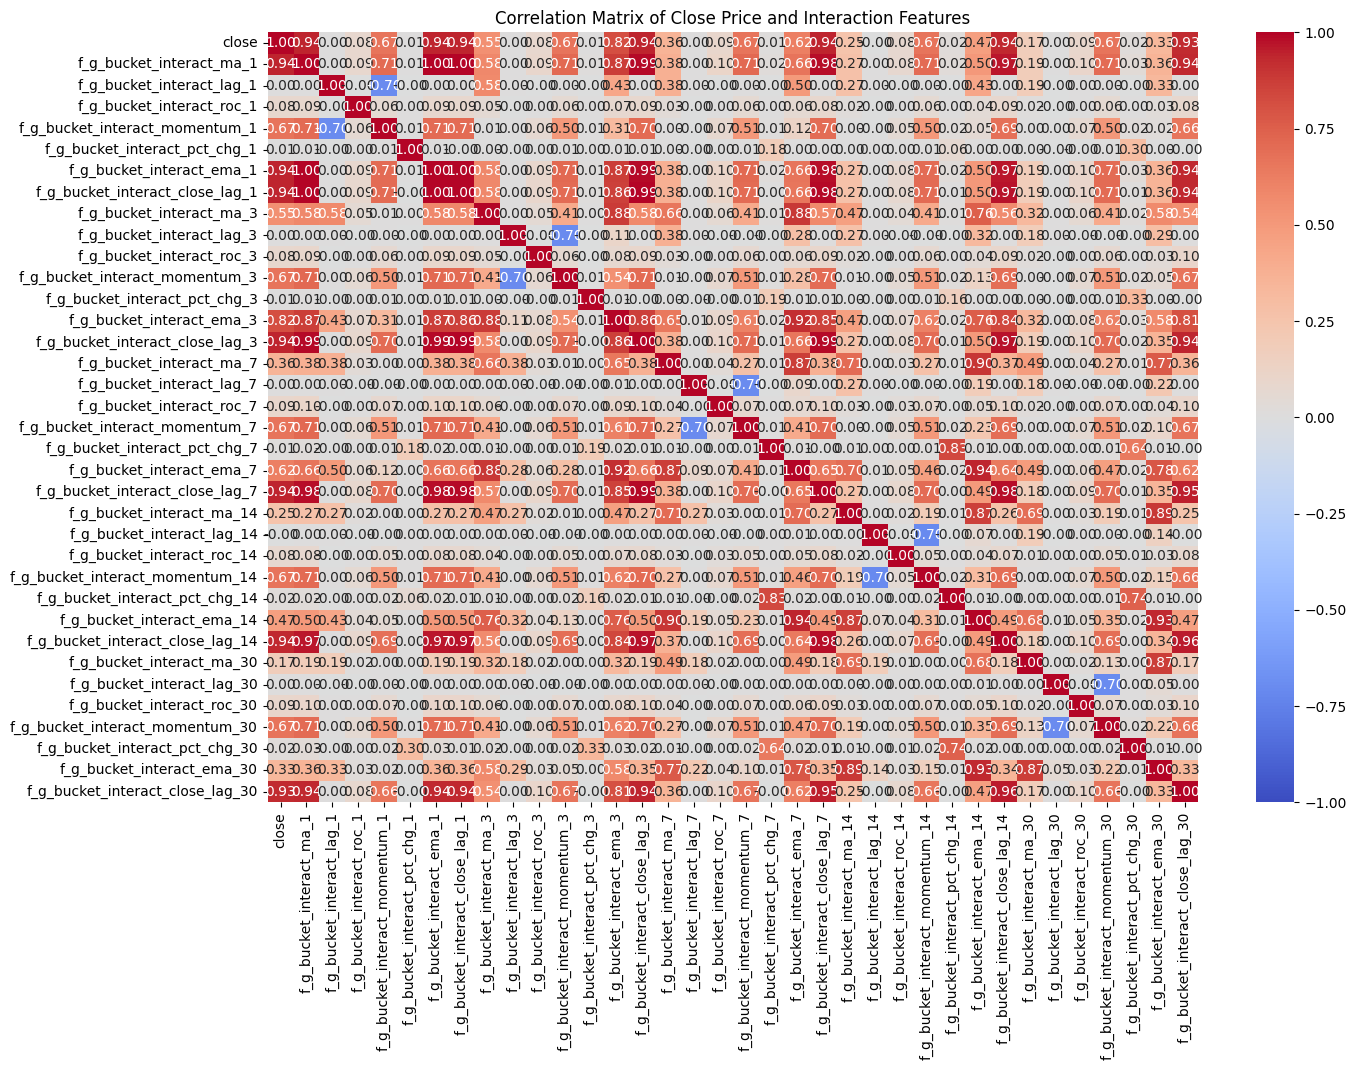

,correlation_with_close
f_g_bucket_interact_ma_1,0.940831
f_g_bucket_interact_ema_1,0.940831
f_g_bucket_interact_close_lag_3,0.938162
f_g_bucket_interact_close_lag_7,0.938031
f_g_bucket_interact_close_lag_1,0.937792
f_g_bucket_interact_close_lag_14,0.936475
f_g_bucket_interact_close_lag_30,0.925280
f_g_bucket_interact_ema_3,0.815968
f_g_bucket_interact_momentum_7,0.670005
f_g_bucket_interact_momentum_3,0.669855


In [13]:
# Bucket the fear_greed_value into categories: 0, 0.25, 0.5, 0.75, 1
bins = [0, 25, 50, 75, 100]
labels = [0.25, 0.5, 0.75, 1]
data['fear_greed_bucket'] = pd.cut(data['fear_greed_value'], bins=bins, labels=labels, include_lowest=True)

# Convert the categorical data to numerical form for interaction
data['fear_greed_bucket'] = data['fear_greed_bucket'].astype(float)

# Create interaction terms and calculate correlations using the bucketed fear_greed_value
interaction_correlations_bucketed = {}

for feature in close_price_fetures:
    interaction_term = f'f_g_bucket_interact_{feature}'
    data[interaction_term] = data['fear_greed_bucket'] * data[feature]
    interaction_correlations_bucketed[interaction_term] = data[[interaction_term, 'close']].corr().iloc[0, 1]

# Convert the dictionary to a sorted DataFrame for easy viewing
interaction_corr_bucketed_df = pd.DataFrame.from_dict(interaction_correlations_bucketed, orient='index', columns=['correlation_with_close'])
interaction_corr_bucketed_df = interaction_corr_bucketed_df.sort_values(by='correlation_with_close', ascending=False)

# Plotting the correlation matrix
correlation_matrix = data[['close'] + [f'f_g_bucket_interact_{feature}' for feature in close_price_fetures]].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Close Price and Interaction Features')
plt.show()

top_3_features_fear_greed = interaction_corr_bucketed_df.head(3).index
interaction_corr_bucketed_df.head(100)

In [14]:
f_g_columns = [col for col in data.columns if col.startswith('f_g_')]
f_g_columns_to_drop = list(set(f_g_columns) - set(top_3_features_fear_greed))

data = data.drop(f_g_columns_to_drop, axis=1)
data.head()

,date,symbol,target,open,high,low,close,volume,name,keywords,...,close_lag_30,month,day,dayofweek,timestamp,symbol_encoded,fear_greed_bucket,f_g_bucket_interact_ma_1,f_g_bucket_interact_ema_1,f_g_bucket_interact_close_lag_3
15304,2020-07-13,PCI,0.0,0.143664,0.147483,0.140770,0.143750,1200432,Paycoin,Paycoin,...,0.154879,7,13,0,1.594598e+09,8724623,0.5,0.071875,0.071875,0.070752
15305,2020-07-13,ICX,0.5,0.395887,0.431316,0.395501,0.410839,46141104,ICON,ICON,...,0.343204,7,13,0,1.594598e+09,8457401,0.5,0.205419,0.205419,0.196688
15306,2020-07-13,DDK,0.0,4.472541,4.487512,4.191892,4.233489,75194,DDKoin,DDKoin,...,2.362748,7,13,0,1.594598e+09,3653993,0.5,2.116745,2.116745,1.898949
15307,2020-07-13,OGN,0.0,0.314618,0.316820,0.284335,0.292777,11989866,Origin Protocol,Origin Protocol,...,0.197955,7,13,0,1.594598e+09,5160903,0.5,0.146389,0.146389,0.144708
15308,2020-07-13,BOA,0.0,0.070873,0.075609,0.070334,0.071849,1224509,BOSagora,BOSagora,...,0.059844,7,13,0,1.594598e+09,7161235,0.5,0.035925,0.035925,0.035602


# GDP factors

In [15]:
gdp_weights = {
    'gdp_United States': 24,  
    'gdp_China': 16,          
    'gdp_Japan': 6,           
    'gdp_Germany': 5,         
    'gdp_India': 4,           
    'gdp_United Kingdom': 3,  
}

# Initialize the weighted aggregates
data['weighted_global_gdp'] = 0

# Calculate the weighted GDP, inflation rate, and interest rate
for gdp_col, weight in gdp_weights.items():
    # Check if the column exists to avoid KeyError
    if gdp_col in data.columns:
        data['weighted_global_gdp'] += data[gdp_col] * weight

# Normalize by the total weight sum (to create an average)
total_weight = sum(gdp_weights.values())
data['weighted_global_gdp'] /= total_weight

data.head()

,date,symbol,target,open,high,low,close,volume,name,keywords,...,month,day,dayofweek,timestamp,symbol_encoded,fear_greed_bucket,f_g_bucket_interact_ma_1,f_g_bucket_interact_ema_1,f_g_bucket_interact_close_lag_3,weighted_global_gdp
15304,2020-07-13,PCI,0.0,0.143664,0.147483,0.140770,0.143750,1200432,Paycoin,Paycoin,...,7,13,0,1.594598e+09,8724623,0.5,0.071875,0.071875,0.070752,1.405724e+13
15305,2020-07-13,ICX,0.5,0.395887,0.431316,0.395501,0.410839,46141104,ICON,ICON,...,7,13,0,1.594598e+09,8457401,0.5,0.205419,0.205419,0.196688,1.405724e+13
15306,2020-07-13,DDK,0.0,4.472541,4.487512,4.191892,4.233489,75194,DDKoin,DDKoin,...,7,13,0,1.594598e+09,3653993,0.5,2.116745,2.116745,1.898949,1.405724e+13
15307,2020-07-13,OGN,0.0,0.314618,0.316820,0.284335,0.292777,11989866,Origin Protocol,Origin Protocol,...,7,13,0,1.594598e+09,5160903,0.5,0.146389,0.146389,0.144708,1.405724e+13
15308,2020-07-13,BOA,0.0,0.070873,0.075609,0.070334,0.071849,1224509,BOSagora,BOSagora,...,7,13,0,1.594598e+09,7161235,0.5,0.035925,0.035925,0.035602,1.405724e+13


# Interest rate

In [16]:
# Identify all interest rate columns
interest_rate_columns = [col for col in data.columns if col.startswith('interest_rate_')]

# Calculate moving averages for different periods (e.g., 7-day, 30-day)
# Precompute moving averages
ma_7_cols = {col: data[col].rolling(window=7).mean() for col in interest_rate_columns}
ma_30_cols = {col: data[col].rolling(window=30).mean() for col in interest_rate_columns}

# Calculate trends using vectorized operations
trend_data = pd.DataFrame(index=data.index)

for col in interest_rate_columns:
    trend_data[col] = np.where(ma_7_cols[col] > ma_30_cols[col], 1, 
                               np.where(ma_7_cols[col] < ma_30_cols[col], -1, 0))

# Calculate the overall interest rate
data['overall_interest_rate'] = data[interest_rate_columns].mean(axis=1)

# Calculate the overall trend by summing trends across all interest rates
data['interest_rate_trend'] = trend_data.sum(axis=1)

data.head()


,date,symbol,target,open,high,low,close,volume,name,keywords,...,dayofweek,timestamp,symbol_encoded,fear_greed_bucket,f_g_bucket_interact_ma_1,f_g_bucket_interact_ema_1,f_g_bucket_interact_close_lag_3,weighted_global_gdp,overall_interest_rate,interest_rate_trend
15304,2020-07-13,PCI,0.0,0.143664,0.147483,0.140770,0.143750,1200432,Paycoin,Paycoin,...,0,1.594598e+09,8724623,0.5,0.071875,0.071875,0.070752,1.405724e+13,0.816792,0
15305,2020-07-13,ICX,0.5,0.395887,0.431316,0.395501,0.410839,46141104,ICON,ICON,...,0,1.594598e+09,8457401,0.5,0.205419,0.205419,0.196688,1.405724e+13,0.816792,0
15306,2020-07-13,DDK,0.0,4.472541,4.487512,4.191892,4.233489,75194,DDKoin,DDKoin,...,0,1.594598e+09,3653993,0.5,2.116745,2.116745,1.898949,1.405724e+13,0.816792,0
15307,2020-07-13,OGN,0.0,0.314618,0.316820,0.284335,0.292777,11989866,Origin Protocol,Origin Protocol,...,0,1.594598e+09,5160903,0.5,0.146389,0.146389,0.144708,1.405724e+13,0.816792,0
15308,2020-07-13,BOA,0.0,0.070873,0.075609,0.070334,0.071849,1224509,BOSagora,BOSagora,...,0,1.594598e+09,7161235,0.5,0.035925,0.035925,0.035602,1.405724e+13,0.816792,0


# Inflation rate

In [17]:
# Identify all inflation rate columns
inflation_rate_columns = [col for col in data.columns if col.startswith('inflation_rate_')]

# Calculate moving averages for different periods (e.g., 7-day, 30-day)
# Precompute moving averages
ma_7_cols = {col: data[col].rolling(window=7).mean() for col in inflation_rate_columns}
ma_30_cols = {col: data[col].rolling(window=30).mean() for col in inflation_rate_columns}

# Calculate trends using vectorized operations
trend_data = pd.DataFrame(index=data.index)

for col in inflation_rate_columns:
    trend_data[col] = np.where(ma_7_cols[col] > ma_30_cols[col], 1, 
                               np.where(ma_7_cols[col] < ma_30_cols[col], -1, 0))

# Calculate the overall inflation rate
data['overall_inflation_rate'] = data[inflation_rate_columns].mean(axis=1)

# Calculate the overall trend by summing trends across all inflation rates
data['inflation_rate_trend'] = trend_data.sum(axis=1)

data.head()


,date,symbol,target,open,high,low,close,volume,name,keywords,...,symbol_encoded,fear_greed_bucket,f_g_bucket_interact_ma_1,f_g_bucket_interact_ema_1,f_g_bucket_interact_close_lag_3,weighted_global_gdp,overall_interest_rate,interest_rate_trend,overall_inflation_rate,inflation_rate_trend
15304,2020-07-13,PCI,0.0,0.143664,0.147483,0.140770,0.143750,1200432,Paycoin,Paycoin,...,8724623,0.5,0.071875,0.071875,0.070752,1.405724e+13,0.816792,0,131.517715,0
15305,2020-07-13,ICX,0.5,0.395887,0.431316,0.395501,0.410839,46141104,ICON,ICON,...,8457401,0.5,0.205419,0.205419,0.196688,1.405724e+13,0.816792,0,131.517715,0
15306,2020-07-13,DDK,0.0,4.472541,4.487512,4.191892,4.233489,75194,DDKoin,DDKoin,...,3653993,0.5,2.116745,2.116745,1.898949,1.405724e+13,0.816792,0,131.517715,0
15307,2020-07-13,OGN,0.0,0.314618,0.316820,0.284335,0.292777,11989866,Origin Protocol,Origin Protocol,...,5160903,0.5,0.146389,0.146389,0.144708,1.405724e+13,0.816792,0,131.517715,0
15308,2020-07-13,BOA,0.0,0.070873,0.075609,0.070334,0.071849,1224509,BOSagora,BOSagora,...,7161235,0.5,0.035925,0.035925,0.035602,1.405724e+13,0.816792,0,131.517715,0


In [18]:
data.reset_index()
data.to_parquet(FEATURES_DATA_FILE_PATH, index=False)

sample_dataset = data.sample(n=1000, random_state=42)
sample_dataset.to_csv('../data/features_sample.csv', index=False)